# Principal Component Analysis with Cancer Data

In [296]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [297]:
data=pd.read_csv('Cancer.csv')

In [298]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [300]:
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [302]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [303]:
data.loc[data['Bare Nuclei'] == '?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [304]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
data.info()
print('No missing values in other columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
No missing values in other columns


In [305]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data.loc[data['Bare Nuclei'] == '?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [306]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

data['Bare Nuclei']=data['Bare Nuclei'].replace('?',0)
data['Bare Nuclei']=data['Bare Nuclei'].astype(int)

mean=data.mean()['Bare Nuclei']
data['Bare Nuclei']=data['Bare Nuclei'].replace(mean,0)
# Check for missing value in any other column

data.head()


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


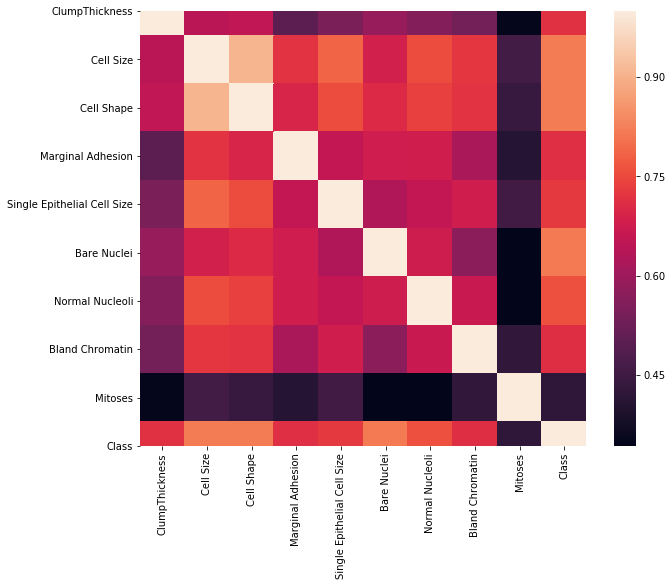

In [311]:
# Check for correlation of variables
data=data.drop('ID',axis=1)
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

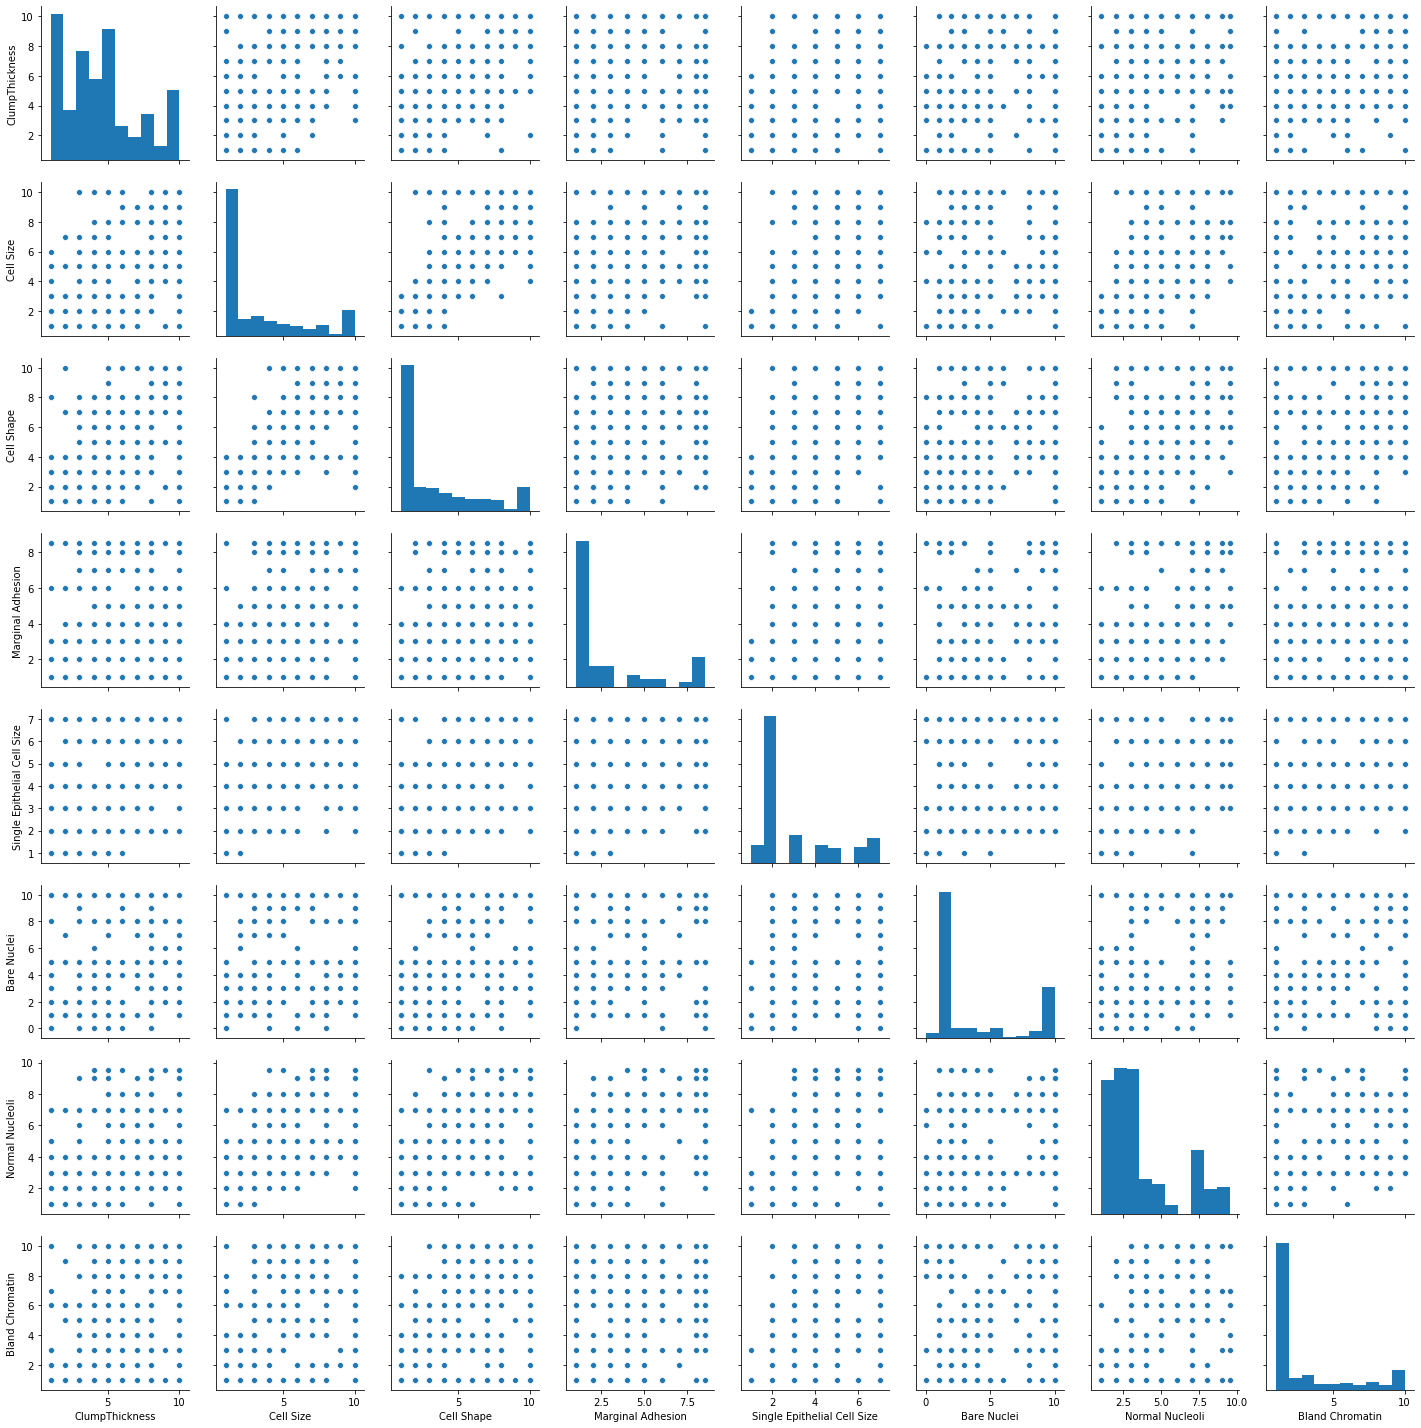

In [292]:
#Let us check the pair plot
sns.pairplot(data)

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [277]:
'since all features are on same scale we can skip'

'since all features are on same scale we can skip'

In [312]:
data.loc[data['Marginal Adhesion'] > 8.5, 'Marginal Adhesion'] = 8.5
data.loc[data['Single Epithelial Cell Size'] > 7.0, 'Single Epithelial Cell Size'] = 7
data.loc[data['Normal Nucleoli'] > 9.5, 'Normal Nucleoli'] = 9.5
data.loc[data['Bland Chromatin'] > 11.0, 'Bland Chromatin'] = 11.0


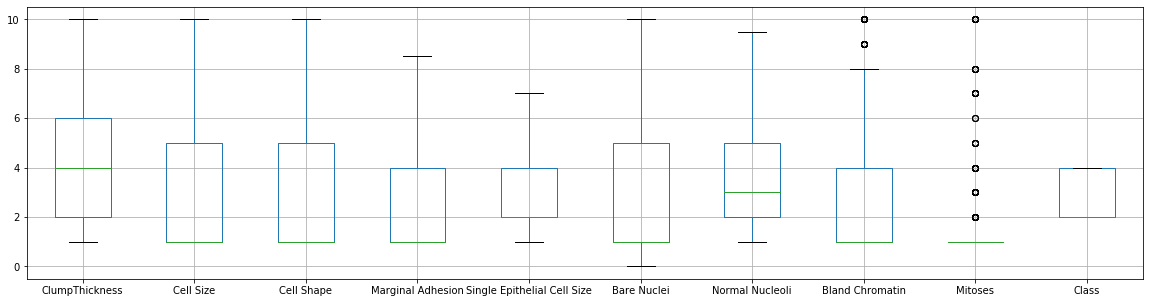

In [313]:
data.boxplot(figsize=(20,5))

# Q6 Create a covariance matrix for identifying Principal components

In [314]:
data=data.drop(['Mitoses'],axis=1)
data=data.drop(['Class'],axis=1)

In [315]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=data.cov()

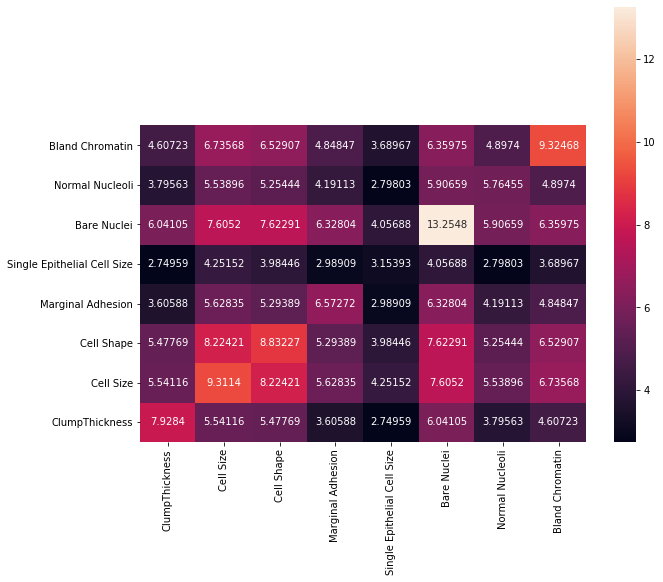

In [316]:
cov_matrix
plt.figure(figsize=(10,8))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.ylim(0,11)
plt.show()


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [317]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 
# printing eigen values 
print("Printing the Eigen values of the given dataframe:\n", 
      eigenvalues) 
  
# printing eigen vectors 
print("Printing eigenvectors of the given dataframe:\n",
      eigenvectors)


Printing the Eigen values of the given dataframe:
 [46.07929471  5.1018178   4.10252303  2.93984766  2.2752348   1.8164205
  1.04812339  0.77943481]
Printing eigenvectors of the given dataframe:
 [[-0.30853431  0.05985129  0.89261775  0.16352698 -0.2777939  -0.01420471
  -0.01852993 -0.00151453]
 [-0.41457325 -0.23899894  0.01871964 -0.43814078  0.22517704 -0.06971239
  -0.09767233 -0.7166494 ]
 [-0.40291742 -0.18270041  0.05704196 -0.36881982  0.34934489 -0.1319768
   0.42774223  0.58529747]
 [-0.30695096  0.05618    -0.32524294 -0.20579295 -0.8058138  -0.3004234
   0.11654835  0.03629874]
 [-0.21358782 -0.10962583 -0.0546008  -0.08585793  0.05097088 -0.1213685
  -0.88613888  0.3597765 ]
 [-0.45640357  0.79072803 -0.17588415  0.24370228  0.2595563  -0.06741827
  -0.00272792 -0.06478258]
 [-0.29666695 -0.0410078  -0.12651354 -0.05908684 -0.16739838  0.92550578
  -0.01482136  0.07750682]
 [-0.36665926 -0.51362575 -0.20958103  0.72983501  0.05252051 -0.10691035
   0.0900033  -0.0536414 ]

# Q8 Find variance and cumulative variance by each eigen vector

In [318]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 71.8387238   79.7925799   86.18851153  90.77180442  94.31894995
  97.15079301  98.78484247 100.        ]


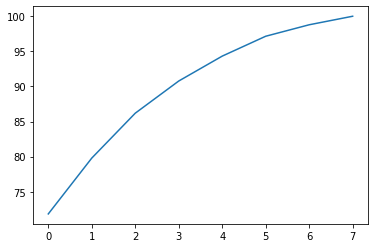

In [319]:
plt.plot(cum_var_exp)

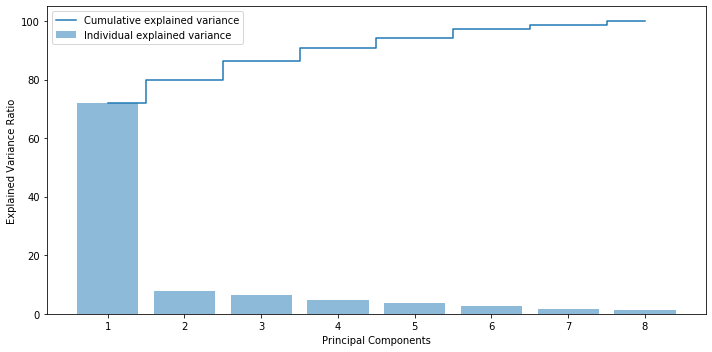

In [320]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [321]:
pca=PCA(n_components=4)
data_reduced=pca.fit_transform(data)
data_reduced

array([[-4.27015252e+00,  3.28336597e-03, -1.83730716e+00,
        -3.43379531e-01],
       [ 4.95235381e+00, -5.01113601e+00,  1.30192216e+00,
         4.06808173e-01],
       [-4.43081756e+00, -6.67742085e-01,  1.23812495e-01,
        -2.60027854e-01],
       ...,
       [ 1.04651797e+01,  7.48056134e+00,  1.27489359e+00,
         9.99655924e-01],
       [ 6.60319586e+00,  3.05321047e+00,  2.06728855e+00,
         1.43825134e+00],
       [ 7.65265453e+00,  1.65407758e+00,  2.08977045e+00,
         3.68350960e+00]])

In [322]:
pca.components_


array([[ 0.30853431,  0.41457325,  0.40291742,  0.30695096,  0.21358782,
         0.45640357,  0.29666695,  0.36665926],
       [-0.05985129,  0.23899894,  0.18270041, -0.05618   ,  0.10962583,
        -0.79072803,  0.0410078 ,  0.51362575],
       [-0.89261775, -0.01871964, -0.05704196,  0.32524294,  0.0546008 ,
         0.17588415,  0.12651354,  0.20958103],
       [-0.16352698,  0.43814078,  0.36881982,  0.20579295,  0.08585793,
        -0.24370228,  0.05908684, -0.72983501]])

# Q10 Find correlation between components and features

In [323]:
df_comp = pd.DataFrame(pca.components_,columns=list(data))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.308534,0.414573,0.402917,0.306951,0.213588,0.456404,0.296667,0.366659
1,-0.059851,0.238999,0.182700,-0.056180,0.109626,-0.790728,0.041008,0.513626
2,-0.892618,-0.018720,-0.057042,0.325243,0.054601,0.175884,0.126514,0.209581
3,-0.163527,0.438141,0.368820,0.205793,0.085858,-0.243702,0.059087,-0.729835


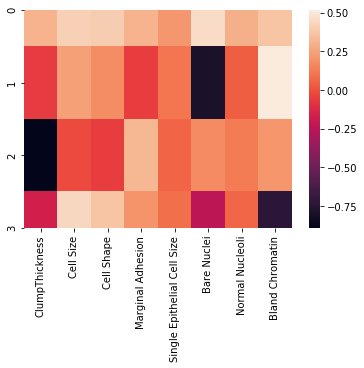

In [324]:
sns.heatmap(df_comp)